<a href="https://colab.research.google.com/github/admiralRus/Mayn/blob/main/3%D0%90%D0%A2_%D0%91%D1%8F%D0%BB%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Аттестационная работа номер 3**

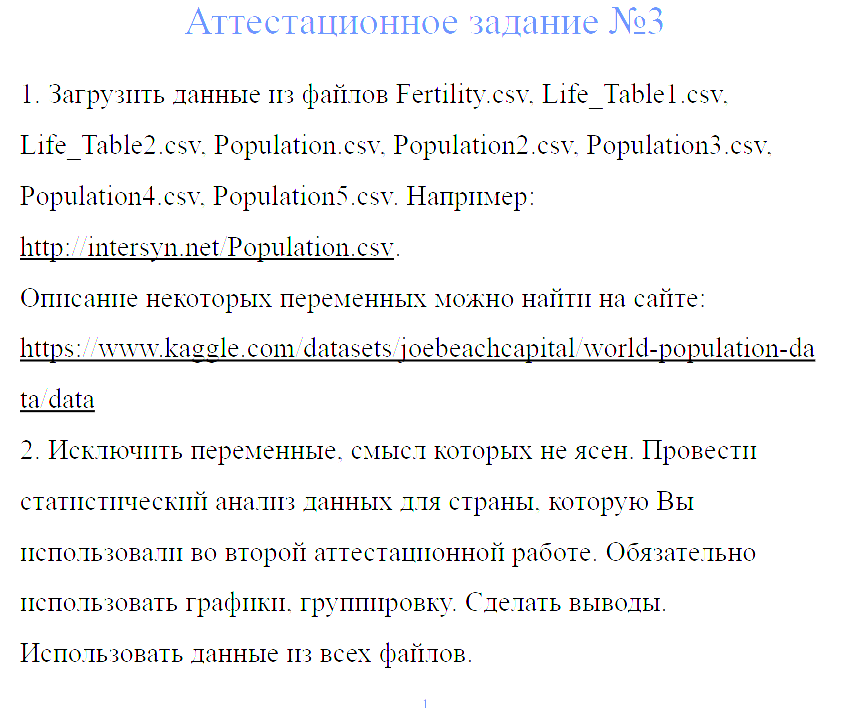

Подгружаем библиотеки

In [438]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [439]:
!pip install dask

1. По условиям аттестации необходимо загрузить все даттасеты. Сделаем это и для удобства назавём переменные также как и исходные файлы

In [440]:
Fertility = 'http://intersyn.net/Fertility.csv'

2. Так как загруженные датасеты требуют слишком больших объёмов памяти - воспользуемся функцией Dask и загрузим в неё файлы

In [441]:
FertilityX = dd.read_csv(Fertility)

3.1 Проанализируем 1 датасет (Fertility) c учётом страны выпавшей во 2 аттестационеой работе - United States of America

In [442]:
FertilityX.columns #название колонок. Судя по всему речь здесь идёт о рождаемости

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'ASFR',
       'PASFR', 'Births'],
      dtype='object')

In [444]:
#проверим какой временной период используется в датасете. Видим, что здесь как исторния, так и прогноз
unique_values = FertilityX['Time'].unique()
unique_values.compute()

0      1950
1      1951
2      1952
3      1953
4      1954
       ... 
146    2096
147    2097
148    2098
149    2099
150    2100
Name: Time, Length: 151, dtype: int64

In [445]:
#Выделим интересующую нас страну
Fertility_USA = FertilityX[FertilityX['Location'] =='United States of America']
Fertility_USA

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,ASFR,PASFR,Births
npartitions=12,,,,,,,,,,,,,,,,,,,,
,int64,int64,float64,float64,float64,int64,int64,object,int64,object,int64,object,int64,float64,int64,int64,int64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [446]:
#Раз речь про рождаемсоть, давайте узнаем сколько в среднем рождается детей
F_Isl1=Fertility_USA.groupby(["Time"]).aggregate({"Births": "mean"}).compute()
F_Isl1


,Births
Time,
1950,96.271857
1951,101.756571
1952,103.325057
1953,104.901743
1954,107.784000
...,...
2096,111.748225
2097,111.463190
2098,111.539829


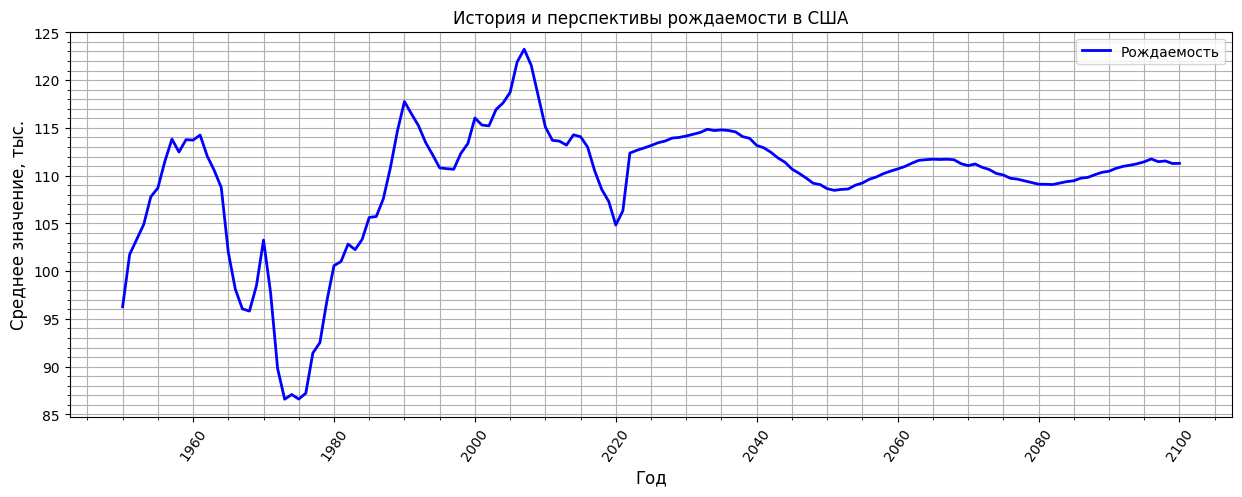

In [448]:
#Для наглядности отобразим данные по максимальной рождаемости на графике
F_Isl1['Births'].plot(figsize=(15,5), label="Рождаемость", color='Blue', linewidth= 2)
plt.xlabel('Год', fontsize= 12)
plt.ylabel('Среднее значение, тыс.', fontsize= 12 )
plt.title("История и перспективы рождаемости в США")
plt.xticks(rotation=55)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle='-')
plt.legend()
plt.show()

Исходя из графика мы видим, что прогноз для США пессимистичен - рождаемость будет сокращаться


3.2 Проанализируем 1 датасеты (Life_Table) с индексами 1 и 2. Судя по названиям - эти датасеты могут быть связаны.
Посмотрим, что в них содержится

In [449]:
Life_Table1 = "http://intersyn.net/Life_Table1.csv"

In [450]:
Life_Table2 = "http://intersyn.net/Life_Table2.csv"

In [451]:
Life_Table11 = dd.read_csv(Life_Table1)

In [452]:
Life_Table22 = dd.read_csv(Life_Table2)

In [453]:
Life_Table11.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'SexID', 'Sex', 'AgeGrp', 'AgeGrpStart',
       'AgeGrpSpan', 'mx', 'qx', 'px', 'lx', 'dx', 'Lx', 'Sx', 'Tx', 'ex',
       'ax'],
      dtype='object')

In [454]:
unique_values2 = Life_Table11['Time'].unique()
unique_values2.compute()

0     1950
1     1951
2     1952
3     1953
4     1954
      ... 
67    2017
68    2018
69    2019
70    2020
71    2021
Name: Time, Length: 72, dtype: int64

In [456]:
Life_Table22.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'SexID', 'Sex', 'AgeGrp', 'AgeGrpStart',
       'AgeGrpSpan', 'mx', 'qx', 'px', 'lx', 'dx', 'Lx', 'Sx', 'Tx', 'ex',
       'ax'],
      dtype='object')

In [457]:
unique_values3 = Life_Table22['Time'].unique()
unique_values3.compute()

0     2022
1     2023
2     2024
3     2025
4     2026
      ... 
74    2096
75    2097
76    2098
77    2099
78    2100
Name: Time, Length: 79, dtype: int64

Смотрим тут расшифровку значений колонок
https://www.kaggle.com/datasets/joebeachcapital/world-population-data/data?select=WPP2022_Fertility_by_Age1

Сравнив колонки и временные периоды обоих датасетов, можно сказать, что первый (с индексом 1) это исторические данные, а второй (с индексом 2) это прогнозные данные.
Для дальнейшего анализа выберем колонку px: Вероятность выживания (npx) для индивидуума в возрасте от x до возраста x+n и узнаем так ли хорошо дела обстоят в США.

In [458]:
Life_United_States1 = Life_Table11[Life_Table11['Location'] == 'United States of America']
Life_United_States2 = Life_Table22[Life_Table22['Location'] == 'United States of America']

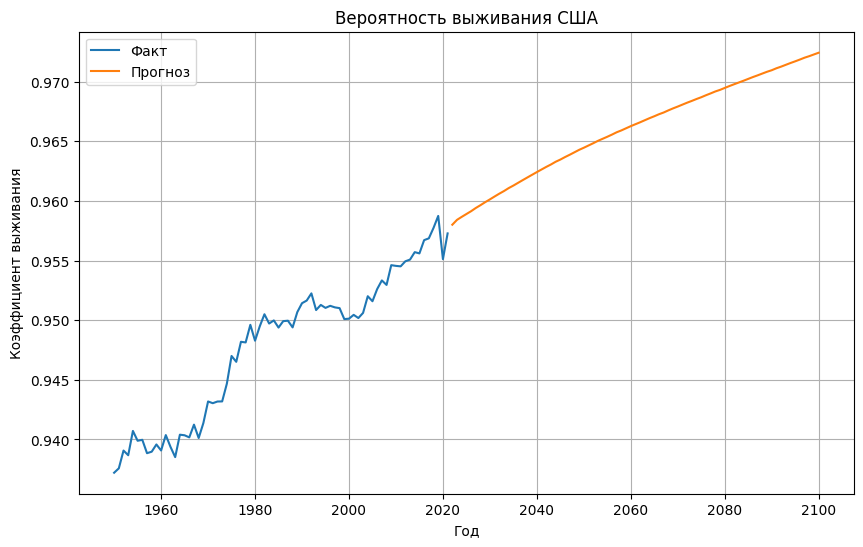

In [459]:
Life_px1 = Life_United_States1.groupby("Time")["px"].mean().compute().plot(figsize=(10,6), label="Факт")
Life_px2 = Life_United_States2.groupby("Time")["px"].mean().compute().plot(figsize=(10,6), label="Прогноз")
plt.xlabel('Год')
plt.ylabel('Коэффициент выживания')
plt.title('Вероятность выживания США')
plt.legend()
plt.grid(True)


Как видим из графика - вероятность индивидуума на выживание в США с каждым годом увеличивается. Что говорит об улучшении факторов влияющих на благоприятные условия жизни

3.3 Проанализируем следующие датасеты. Они имеют схожие названия, поэтому надо понять, что в них содержится и чем они отличаются

In [460]:
url = "http://intersyn.net/Population.csv"

In [461]:
url2 = "http://intersyn.net/Population2.csv"

In [462]:
url3 = "http://intersyn.net/Population3.csv"

In [463]:
url4 = "http://intersyn.net/Population4.csv"

In [464]:
url5 = "http://intersyn.net/Population5.csv"

In [465]:
ddf = dd.read_csv(url)

In [466]:
ddf2 = dd.read_csv(url2)

In [467]:
ddf3 = dd.read_csv(url3)

In [468]:
ddf4 = dd.read_csv(url4)

In [469]:
ddf5 = dd.read_csv(url5)

In [470]:
ddf.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

In [471]:
ddf2.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

In [472]:
ddf3.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

In [473]:
ddf4.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

In [474]:
ddf5.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

Как видим - эти датасеты имеют в своём составе одинаковые колонки. Далее следует проверить на временные периоды

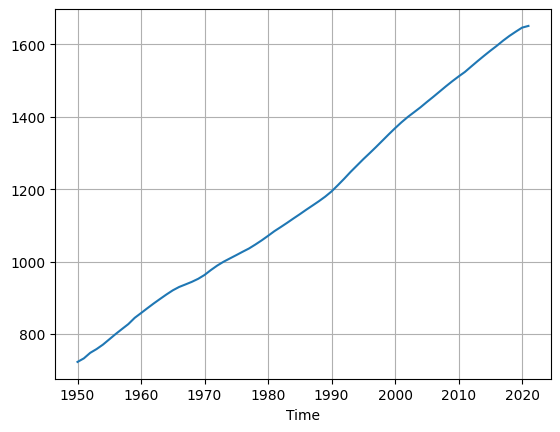

In [475]:
ddf_United_States = ddf[ddf['Location'] == 'United States of America']
ddf_United_States_map = ddf_United_States.groupby("Time")["PopMale"].mean().compute().plot()
plt.grid(True)

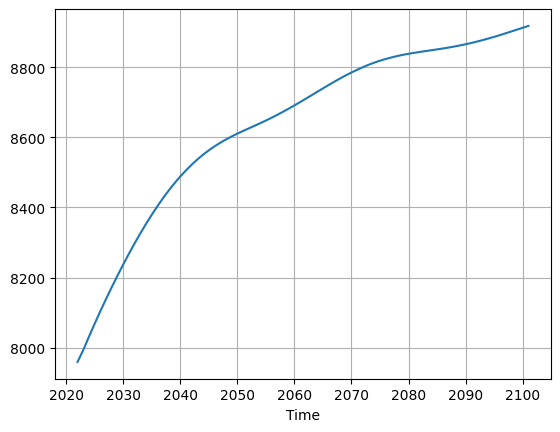

In [476]:
ddf2_United_States = ddf2[ddf2['Location'] == 'United States of America']
ddf2_United_States_map = ddf2_United_States.groupby("Time")["PopMale"].mean().compute().plot()
plt.grid(True)

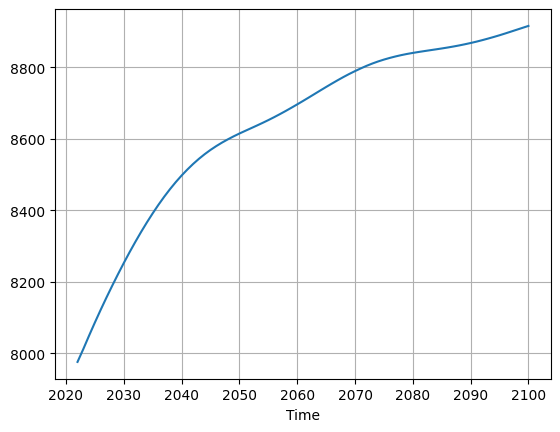

In [477]:
ddf3_United_States = ddf3[ddf3['Location'] == 'United States of America']
ddf3_United_States_map = ddf3_United_States.groupby("Time")["PopMale"].mean().compute().plot()
plt.grid(True)

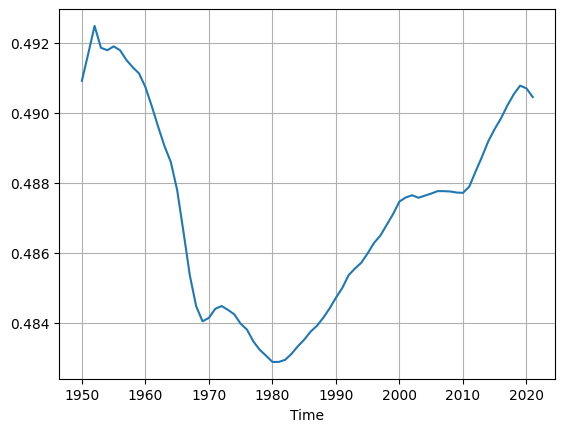

In [478]:
ddf4_United_States = ddf4[ddf4['Location'] == 'United States of America']
ddf4_United_States_map = ddf4_United_States.groupby("Time")["PopMale"].mean().compute().plot()
plt.grid(True)

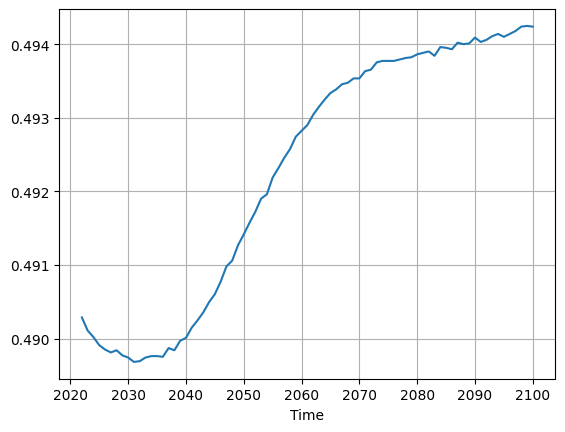

In [479]:
ddf5_United_States = ddf5[ddf5['Location'] == 'United States of America']
ddf5_United_States_map = ddf5_United_States.groupby("Time")["PopMale"].mean().compute().plot()
plt.grid(True)

Судя по графикам можно отметить, что: 1) Существует 2 датасета с "историческими" данными и 3 датасета с прогнозом; 2) Один из "исторических" датасетов вероятно также является прогнозом; 3) Скорее всего прогнозы, это разные варианты;
3) Масштаб значений шкал на графиках различаются. Таким образом, по ним можно попробовать подобрать действительную историю и, соответствующий ему прогнозный вариант.
4) Вероятно 4 и 5 датасеты подходят друг к другу.
5) Также исходя масштаба шкал, можно предположить, что в 1-3 датасетах речь идёт о количестве, в то время, как в 4-5 датасетах вероятно говорится об доле от общего количества, т.е. какой процент от общего числа жителей составляют мужчины.

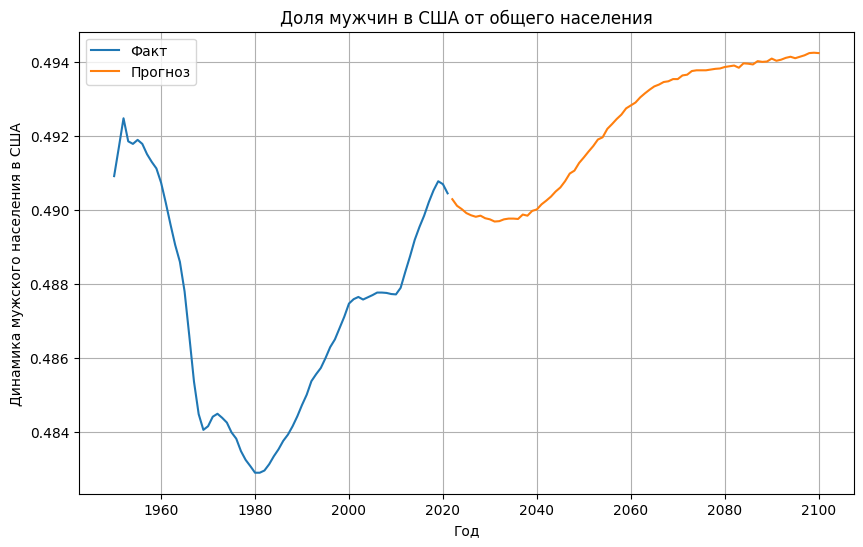

In [481]:
ddf4_United_States_map = ddf4_United_States.groupby("Time")["PopMale"].mean().compute().plot(figsize=(10,6), label="Факт")
ddf5_United_States_map = ddf5_United_States.groupby("Time")["PopMale"].mean().compute().plot(figsize=(10,6), label="Прогноз")

plt.xlabel('Год')
plt.ylabel('Динамика мужского населения в США')
plt.title('Доля мужчин в США от общего населения')
plt.legend()
plt.grid(True)

***Проанализировав получившийся график можно объяснить, почему несмотря на увеличивающиеся шансы выживания, в США прогнозируется общее уменьшение населения. Причина в том, что доля мужчин будет увеличеваться, а следовательно - количество женщинам будет труднее найти себе пару. Нет пары у женщины - нет детей. Нет детей - рождаемость падает. Соответственно поэтому, правительство США в данный момент активно привлекает мигрантов на свою территорию. ***

In [482]:
print('Конец')

Конец
